## Data Analysis Final Project with Titanic Data
### by Eddy Song

<strong>INTRO</strong><br>
Obviously, the most interesting question about titanic is "What factor did affect their survival?" <br>
So I have came up with 3 subquestions at the beginning. <br>
<li>Survival rate by Age</li>
<li>Survival rate by Sex</li>
<li>Survival rate by Class</li>

<strong> 1) Read csv as dataframe </strong>

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Titanic = pd.read_csv('/Users/songbumgeun/Programming/DA101/titanic_data_1.csv')
Titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<strong> 2) Data Wrangling</strong>
<br> There is some missing data in dataframe.<br>
If I get rid of all of them, the data would be not enough.<br>
So I will remove rows with missing values for variable I'll analyze.

In [43]:
Titanic = Titanic.dropna(subset=['Survived','Pclass','Age','Sex'])
len(Titanic)

714

<strong> 3) Check the correlation between Survival and other factors </strong>

In [44]:
print (Titanic.corr()['Survived'])

PassengerId    0.029340
Survived       1.000000
Pclass        -0.359653
Age           -0.077221
SibSp         -0.017358
Parch          0.093317
Fare           0.268189
Name: Survived, dtype: float64


I found 'Sex' is excluded because its data type is not numerical.<br>
I replace string data with numberical data.

In [45]:
Replaced_Titanic = Titanic.replace({'male': 0, 'female': 1})
Replaced_Titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S


And then I calculate correlation again.

In [46]:
print (Replaced_Titanic.corr()['Survived'])

PassengerId    0.029340
Survived       1.000000
Pclass        -0.359653
Sex            0.538826
Age           -0.077221
SibSp         -0.017358
Parch          0.093317
Fare           0.268189
Name: Survived, dtype: float64


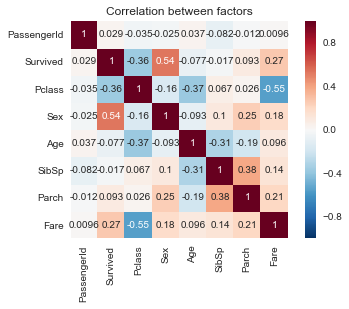

In [47]:
sns.heatmap(Replaced_Titanic.corr(), square=True, annot=True)
sns.plt.title('Correlation between factors')

Implication: It shows there is meaningful correlation between 'Sex', 'Age', 'Class' and 'Survival'

<strong> 4) Grouping dataframe by each factor and plotting them </strong>

Axes(0.125,0.125;0.775x0.755)


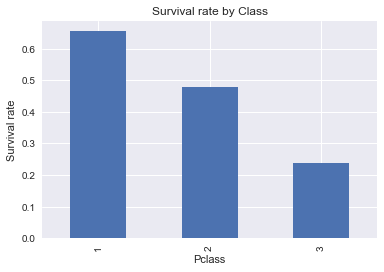

In [48]:
%matplotlib inline 
Survival_by_class = Titanic.groupby('Pclass')
print (Survival_by_class.mean()['Survived'].plot(title='Survival rate by Class', \
                                         kind='bar'))
plt.ylabel('Survival rate')

Implication: The higher class people survived much more than the lower class people.

Axes(0.125,0.125;0.775x0.755)


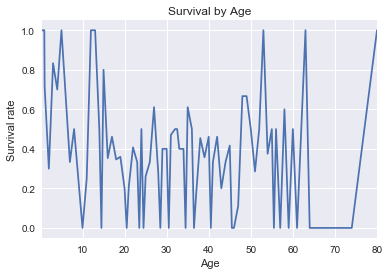

In [49]:
Survival_by_age = Titanic.groupby('Age')
print (Survival_by_age.mean()['Survived'].plot(title='Survival by Age'))
plt.ylabel('Survival rate')

Survival rate by age does not show the meaningful result. <br>Because data for each age is not statistically enough. <br>So I decided to round off the age to make enough data for groups.<br> Age is rounded to the nearest ten.

Axes(0.125,0.125;0.775x0.755)


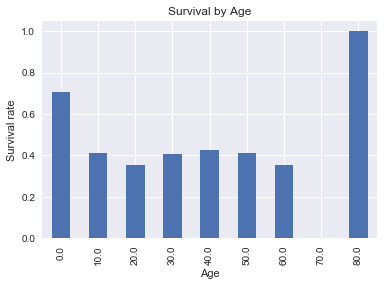

In [50]:
Survival_by_age = Titanic.round({'Age': -1}).groupby('Age')
print (Survival_by_age.mean()['Survived'].plot(title='Survival by Age',kind='bar'))
plt.ylabel('Survival rate')

Implication: Baby (younger than 5) and eldery (older than 75) have high survival rate. People in Titanic must have put a priority on saving the baby and elderly people.

Axes(0.125,0.125;0.775x0.755)


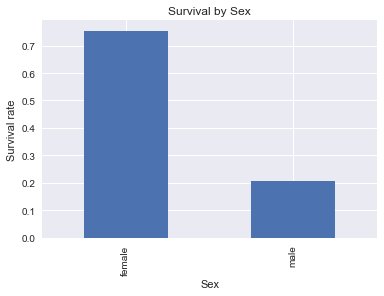

In [51]:
Survival_by_sex = Titanic.groupby('Sex')
print (Survival_by_sex.mean()['Survived'].plot(title='Survival by Sex', kind='bar'))
plt.ylabel('Survival rate')

Implication: Survival rate of female passenger is envidently higer than male passenger. <br> It shows that male passenger tried to save female passenger first. 

<strong>5) Exploring with 2 dimensional data</strong>

Axes(0.125,0.125;0.775x0.755)


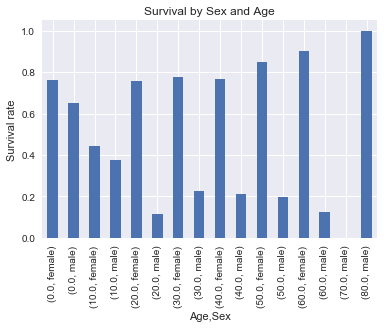

In [52]:
Survival_by_age = Titanic.round({'Age': -1}).groupby(['Age','Sex'])
print (Survival_by_age.mean()['Survived'].plot(title='Survival by Sex and Age',kind='bar'))
plt.ylabel('Survival rate')

Implication: Male passenger whose age is between twenties and sixties made sacrifice for baby, women, and elderly people. The “women, elderly and children first” rule seems to be applied when loading the lifeboats.

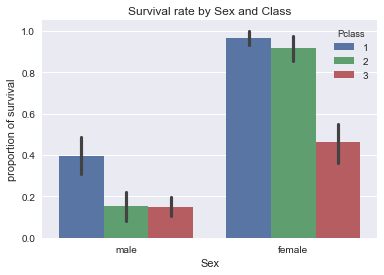

In [53]:
sns.barplot(data=Titanic,  x="Sex", hue='Pclass', y='Survived', estimator=np.mean);
plt.ylabel('proportion of survival');
plt.title('Survival rate by Sex and Class')

Implication: The difference between rates of survival for 1st class men and 3rd class women is not statistically significant.

## Summary
<li>The higher class people survived much more than the lower class people.</li>
<li>Babies (younger than 5) and eldery people (older than 75) have high survival rate.</li>
<li>Survival rate of female passenger is envidently higer than male passenger.</li>
<li>Male passenger whose age is between twenties and sixties have significantly lower survival rate for baby, women, and elderly people.</li>
<br>
<li><strong>Only with this data, This means only correlation so we cannot say that Age, Class, and Sex is the causes of death.</strong></li>